In [29]:
## Import Basic libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

# Import flight data
flights = pd.read_csv("data/Train.csv")


RSEED = 42


# Overview Columns
- DATOP - Date of flight
- FLTID - Flight number
- DEPSTN - Departure point
- ARRSTN - Arrival point
- STD - Scheduled Time departure
- STA - Scheduled Time arrival
- STATUS - Flight status
    - ETD - Expected Time departure
    - ETA - Expected Time arrival
    - ATD - Actual Time of Departure
    - ATA - Actual Time of arrival
    - DELAY1 - Delay code 1
    - DUR1 - delay time 1
    - DELAY2 - Delay code 2
    - DUR2 - delay time 2
    - DELAY3 - Delay code 3
    - DUR3 - delay time 3
    - DELAY4 - Delay code 4
    - DUR4 - delay time 4
- AC - Aircraft Code

In [30]:
flights.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [31]:
## Spalte für Origin-Destination Paar hinzugefügt
flights["OD"] = flights.DEPSTN + "_" + flights.ARRSTN

flights.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,OD
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,CMN_TUN
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,MXP_TUN
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,TUN_IST
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,DJE_NTE
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,TUN_ALG


In [32]:
flights.OD.value_counts()

OD
ORY_TUN    4579
TUN_ORY    4564
TUN_TUN    4320
DJE_TUN    3645
TUN_DJE    3521
           ... 
SKG_ADB       1
ADB_TUN       1
FCO_FCO       1
TUN_SKG       1
HBE_CAI       1
Name: count, Length: 741, dtype: int64

In [33]:
flights.DEPSTN.value_counts()

DEPSTN
TUN    42522
DJE    10252
ORY     6755
MIR     5248
MRS     2845
       ...  
ADB        1
SKG        1
OTP        1
KBP        1
CTA        1
Name: count, Length: 132, dtype: int64

In [34]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
 10  OD      107833 non-null  object 
dtypes: float64(1), object(10)
memory usage: 9.0+ MB


In [35]:
# DATOP und STD direkt in datetime umwandeln
flights["DATOP"] = pd.to_datetime(flights["DATOP"], format="%Y-%m-%d", errors="coerce")
flights["STD"] = pd.to_datetime(flights["STD"], format="%Y-%m-%d %H:%M:%S", errors="coerce")

# STA enthält Uhrzeit mit Punkt statt Doppelpunkt – erst korrigieren, dann umwandeln
flights["STA_cleaned"] = flights["STA"].str.replace(".", ":", regex=False)
flights["STA"] = pd.to_datetime(flights["STA_cleaned"], format="%Y-%m-%d %H:%M:%S", errors="coerce")

# Temporäre Hilfsspalte entfernen
flights.drop(columns=["STA_cleaned"], inplace=True)

In [36]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ID      107833 non-null  object        
 1   DATOP   107833 non-null  datetime64[ns]
 2   FLTID   107833 non-null  object        
 3   DEPSTN  107833 non-null  object        
 4   ARRSTN  107833 non-null  object        
 5   STD     107833 non-null  datetime64[ns]
 6   STA     107833 non-null  datetime64[ns]
 7   STATUS  107833 non-null  object        
 8   AC      107833 non-null  object        
 9   target  107833 non-null  float64       
 10  OD      107833 non-null  object        
dtypes: datetime64[ns](3), float64(1), object(7)
memory usage: 9.0+ MB


In [37]:
flights["STATUS"].value_counts()

STATUS
ATA    93679
SCH    13242
DEP      467
RTR      294
DEL      151
Name: count, dtype: int64

In [38]:
round(flights["target"].value_counts(normalize=True),4)

target
0.0       0.3540
10.0      0.0282
15.0      0.0249
5.0       0.0223
20.0      0.0214
           ...  
904.0     0.0000
2058.0    0.0000
2655.0    0.0000
2602.0    0.0000
1007.0    0.0000
Name: proportion, Length: 968, dtype: float64

<Axes: xlabel='target', ylabel='Count'>

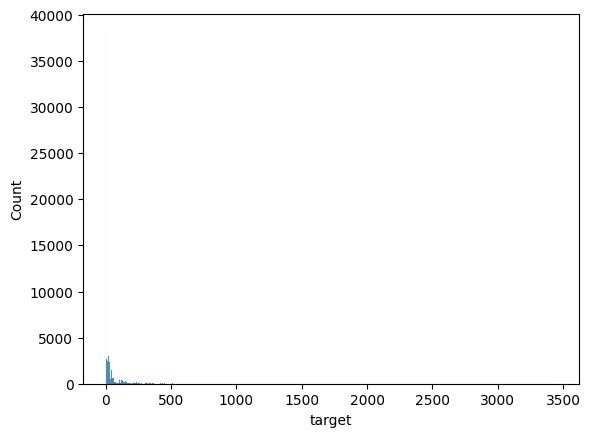

In [39]:
sns.histplot(flights, x="target")

In [40]:
flights.groupby("AC").target.mean().sort_values(ascending=False)

AC
OL 321ABY    205.400000
GJ 734CGC    167.705882
5K 345TFX    136.906542
GW 320MQH    126.147059
GJ 734MGC    121.693333
                ...    
TU CR9XXX      0.000000
UG AT7AT7      0.000000
UG CR9CR9      0.000000
UG CR9XXX      0.000000
TU 32A32A      0.000000
Name: target, Length: 68, dtype: float64

In [41]:
# Wochentag (0 = Montag, 6 = Sonntag)
flights["weekday"] = flights["DATOP"].dt.weekday

# Monat (1 = Januar, 12 = Dezember)
flights["month"] = flights["DATOP"].dt.month

# Abflugstunde (Stunde aus geplanter Abflugzeit)
flights["dep_hour"] = flights["STD"].dt.hour

# Ankunftsstunde (Stunde aus geplanter Ankunftszeit)
flights["arr_hour"] = flights["STA"].dt.hour

# Geplante Flugdauer in Minuten
flights["scheduled_duration_min"] = (flights["STA"] - flights["STD"]).dt.total_seconds() / 60


In [42]:
## Spaltennamen bereinigen
flights.columns = (
    flights.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
    .str.replace(r"[^\w]", "", regex=True)
)

## Leerzeichen am Anfang und Ende innerhalb der Spalte fltid entfernt
flights["fltid"] = flights["fltid"].str.strip()

In [43]:
flights.head()

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target,od,weekday,month,dep_hour,arr_hour,scheduled_duration_min
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,CMN_TUN,6,1,10,12,145.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,MXP_TUN,2,1,15,16,110.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,TUN_IST,5,1,4,6,155.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,DJE_NTE,6,1,14,17,170.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,TUN_ALG,6,1,14,15,80.0


In [44]:
flights[(flights.ac == "TU 32AIMN") & (flights.datop == "2016-08-15")].sort_values("std")

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target,od,weekday,month,dep_hour,arr_hour,scheduled_duration_min
8085,train_id_8085,2016-08-15,AT 0624,OUD,ORY,2016-08-15 08:20:00,2016-08-15 11:00:00,ATA,TU 32AIMN,27.0,OUD_ORY,0,8,8,11,160.0
10936,train_id_10936,2016-08-15,TU 0719,ORY,TUN,2016-08-15 12:40:00,2016-08-15 15:05:00,ATA,TU 32AIMN,170.0,ORY_TUN,0,8,12,15,145.0


In [45]:
flights = flights.drop("id", axis = 1)
flights.head()

,datop,fltid,depstn,arrstn,std,sta,status,ac,target,od,weekday,month,dep_hour,arr_hour,scheduled_duration_min
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,CMN_TUN,6,1,10,12,145.0
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,MXP_TUN,2,1,15,16,110.0
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,TUN_IST,5,1,4,6,155.0
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,DJE_NTE,6,1,14,17,170.0
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,TUN_ALG,6,1,14,15,80.0


In [55]:
flights[flights.status == "ATA"].min(flights.datop)

TypeError: unhashable type: 'Series'

## Fltid mapping (Yannek)

#### fltid Bedeutung:
- 0000: Route planning, repositioning, cargo, maintenance, test, etc.
- 1-99: Premium oder Langstreckenflüge
- 0100-0999: Interkontinental oder wichtige Flüge
- 1000-1299: Kurzstrecke u. Inland
- 3000-5999: Reginalflüge oder Tochtergesellschaften
- 6000+: Codeshare (durch andere Airline ausgeführt)
- 8000: Charter
- 9000: Positionierungsflüge

In [47]:
### Code here

## Feature Engineering (Robert)

#### Zusätzliche Features engineeren (Morgen/Tag/Abend, Kalenderwochen, Werktag/Wochenende)

In [48]:
### Code here

## Baseline Model (Janina)

#### Mean pro Abflughafen (!!!Mean nur auf Train Daten berechnen!!!)

In [49]:
### Code here

#### Observations / General Notes:

- Logarithm to achieve better normal distribution?

- Many of the codes in status not available
- Date features split into month, weekday, hour?

- Country codes for departure and arrival airports?

- Testflüge? WKL0000, TUN --> TUN, Route planning, repositioning, cargo, maintenance, test
- Verspätung erst ab 30 Minuten?

- DEL = Deleted oder Delayed?
- Target bei DEP?



##### Done:
- Alle Spalten vollständig --> Kein Imputing notwendig ✅
- STA, STD und DATOP in datetime formatieren ✅
- Zusätzliche Features engineeren (Stunde, Wochentag, Monat) ✅
- Geplante Flugdauer engineeren: STA - STD ✅
- Alle Spaltennamen formatiert: Leerzeichen entfernt, Lowercase ✅
- Leerzeichen am Anfang und Ende aus Spalte "fltid" entfernt ✅
- Drop "id" column ✅

##### Open:
- Checken ob domestic oder international Flug (anhand von Ländercode des Flughafens)
- Zusätzliche Features engineeren (Morgen/Abend, Kalenderwochen, Werktag/Wochenende)
- Feature "Delayed" engineeren: e.g. Yes/No, Delay Clusters (e.g. up to 30 mins, 30 to 120 mins, more than 120 mins, etc.)

##### Backlog/To Discuss:


##### Verworfen:
- Aircarft Class extrahieren aus AC --> Nicht super relevant im Moment
- Feiertage, Ferien --> Sehr große lokale Unterschiede
- Wetterdaten --> Eher relevant für Outlier, komplex an Daten zu kommen
- Verspätungen bei mehrfachem Einstz der gleichen Maschine an einem Tag --> Wird über Morgen/Tag/Abend Kategorisierung abgedeckt


#### Baseline Modell
- Mean pro Abflughafen (!!!Mean nur auf Train Daten berechnen!!!)
